In [83]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import column_or_1d
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
fraud_detection= pd.read_csv(r"C:\Users\Esther\Desktop\Thoko CodSoft Internship\creditcard.csv")
fraud_detection

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [53]:
fraud_detection.isnull().values.any()

False

In [54]:
fraud_detection.duplicated().any()

True

In [55]:
fraud_detection.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [56]:
fraud_detection.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [57]:
fraud_detection.dtypes 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [58]:
class_counts = fraud_detection['Class'].value_counts()

legitimate = class_counts[0]
fraudulent = class_counts[1]

print(f"Legitimate transactions: {legitimate}")
print(f"Fraudulent transactions: {fraudulent}")

Legitimate transactions: 284315
Fraudulent transactions: 492


In [59]:
class_counts = fraud_detection['Class'].value_counts()
total_transactions = len(fraud_detection)

legitimate_perc = (class_counts[0] / total_transactions) * 100
fraudulent_perc = (class_counts[1] / total_transactions) * 100

print(f"Percentage of Legitimate Transactions: {legitimate_perc:.2f}%")
print(f"Percentage of Fraudulent Transactions: {fraudulent_perc:.2f}%") 

Percentage of Legitimate Transactions: 99.83%
Percentage of Fraudulent Transactions: 0.17%


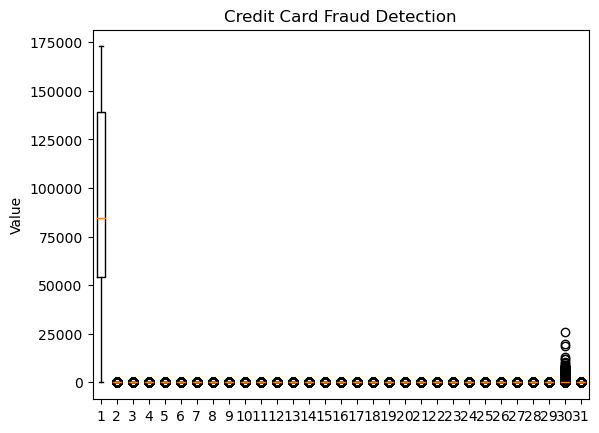

Mean: 3061.3616426392637
Standard Deviation: Time      47488.062585
V1            1.958692
V2            1.651306
V3            1.516252
V4            1.415866
V5            1.380244
V6            1.332269
V7            1.237091
V8            1.194351
V9            1.098630
V10           1.088848
V11           1.020711
V12           0.999200
V13           0.995272
V14           0.958594
V15           0.915314
V16           0.876251
V17           0.849336
V18           0.838175
V19           0.814039
V20           0.770924
V21           0.734523
V22           0.725700
V23           0.624459
V24           0.605646
V25           0.521277
V26           0.482226
V27           0.403632
V28           0.330083
Amount      250.119670
Class         0.041527
dtype: float64
25th Percentile: -0.360783861200836
75th Percentile: 0.580660066315693


In [60]:
mean = np.mean(fraud_detection)
std_dev = np.std(fraud_detection)

q1, q3 = np.percentile(fraud_detection, [25, 75])

plt.boxplot(fraud_detection)
plt.title('Credit Card Fraud Detection')
plt.ylabel('Value')
plt.show()

print('Mean:', mean)
print('Standard Deviation:', std_dev)
print('25th Percentile:', q1)
print('75th Percentile:', q3)

In [61]:
min_amount = fraud_detection['Amount'].min()
max_amount = fraud_detection['Amount'].max()
mean_amount = fraud_detection['Amount'].mean()
median_amount = fraud_detection['Amount'].median()

stats = {
    "Min Amount": min_amount,
    "Max Amount": max_amount,
    "Mean Amount": mean_amount,
    "Median Amount": median_amount
}

for stat_name, stat_value in stats.items():
    print(f"{stat_name}: {stat_value:.2f}") 

Min Amount: 0.00
Max Amount: 25691.16
Mean Amount: 88.35
Median Amount: 22.00


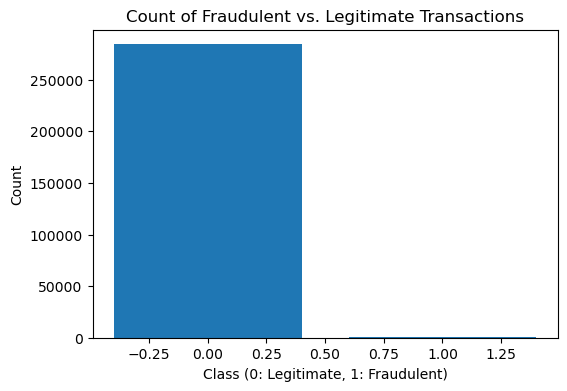

In [62]:
transaction_counts = fraud_detection['Class'].value_counts() 
classes = transaction_counts.index.tolist() 
counts = transaction_counts.tolist()  

plt.figure(figsize=(6, 4))
plt.bar(classes, counts)

plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.title('Count of Fraudulent vs. Legitimate Transactions')

plt.show()

In [63]:
Legitimate=fraud_detection[fraud_detection.Class==0]
Fraudulent=fraud_detection[fraud_detection.Class==1]

In [64]:
print(Legitimate.shape)
print(Fraudulent.shape)

(284315, 31)
(492, 31)


In [65]:
Legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [66]:
Fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [67]:
fraud_detection.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [68]:
Legitimate_sample=Legitimate.sample(n=492)

In [69]:
new_data=pd.concat([Legitimate_sample,Fraudulent], axis=0)

In [70]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1148,896.0,-0.985445,1.151018,1.449753,1.036522,0.305473,-0.039051,0.973651,-0.402890,-0.345995,...,0.005583,0.461592,0.058704,0.106776,-0.276164,-0.376628,-0.202826,-0.010600,38.00,0
93795,64589.0,-0.307991,0.789283,1.285686,0.217013,0.474266,-0.406599,0.511597,-0.054761,-0.539727,...,-0.188947,-0.599630,-0.065575,-0.460489,-0.442958,0.172465,0.100748,0.136668,1.79,0
147902,89148.0,2.028971,-0.028467,-1.431841,0.133875,0.349684,-0.540617,0.123716,-0.171423,0.235792,...,0.305680,1.005211,0.025511,0.756136,0.257074,-0.160796,-0.021718,-0.060665,2.69,0
78192,57409.0,-2.709367,-2.383972,1.378530,1.886559,1.689341,-0.734216,-2.101171,1.011993,-0.155305,...,0.536969,0.554707,0.010380,-0.248276,-0.979664,-0.418610,0.232682,-0.342170,1.00,0
50446,44493.0,1.245522,0.104750,-0.209679,0.161962,0.541847,0.591990,-0.038158,0.072355,-0.272934,...,0.056228,0.236073,-0.256953,-1.263522,0.634716,0.519980,-0.019786,-0.010968,20.20,0


In [71]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [72]:
class_counts = new_data['Class'].value_counts()
legitimate = class_counts[0]
fraudulent = class_counts[1]

print(f"Legitimate transactions: {legitimate}")
print(f"Fraudulent transactions: {fraudulent}")

Legitimate transactions: 492
Fraudulent transactions: 492


In [73]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96197.825203,0.033270,-0.105734,-0.029874,0.051303,0.026168,0.078002,-0.050479,0.050401,0.058124,...,-0.028437,0.027169,-0.017685,-0.041434,0.009181,-0.010112,0.025853,-0.021387,-0.019409,95.477744
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [74]:
x=new_data.drop(columns='Class', axis=1)
y=new_data['Class']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [76]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


In [77]:
model=LogisticRegression()

In [78]:
model.fit(x_train, y_train)

LogisticRegression()

In [79]:
predi = model.predict(x_test)
predi

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [80]:
print(classification_report(y_test, predi))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        99
           1       0.95      0.94      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [81]:
print(confusion_matrix(y_test, predi))

[[94  5]
 [ 6 92]]


In [82]:
model.score(x,y)

0.9390243902439024